# 🚢 **Titanic - My First Kaggle Notebook!**  

This is my first ever published notebook, so of course, it had to be the Titanic Competition! 😄

I’ll begin by understanding the data, exploring its structure, distributions, and correlations. Then, I’ll move on to data cleaning and feature engineering to extract meaningful insights.

Next, I’ll handle data preprocessing, ensuring proper encoding and scaling before diving into model building. I’ll start with a baseline model, compare multiple models using cross-validation, and fine-tune them for better performance. Finally, I’ll explore ensemble modeling to boost accuracy and analyze the final results.

Your feedback is highly appreciated! If you find this notebook useful, please don’t forget to upvote it! 🚀

## 📌 **Overview**  

1️⃣ **Understanding the Data**  
   - Use `.info()` and `.describe()` to grasp the dataset structure  
   - Visualize distributions with **histograms** and **boxplots**  
   - Check **value counts** for categorical features  
   - Identify **missing data** and decide on handling strategies  
   - Analyze **correlations** between numerical features  

2️⃣ **Data Cleaning**  
   - Handle missing values  
   - Correct inconsistencies  

3️⃣ **Data Exploration**  
   - Investigate key themes:  
     - Did wealthier passengers have a higher survival rate?  
     - Survival rates by **location** (cabin, embarkation port)  
     - **Age vs. ticket price** scatterplot  
     - Relationship between **youth and wealth**  
     - Calculate **total amount spent**  

4️⃣ **Feature Engineering**  
   - Create new meaningful features  
   - Decide whether to preprocess train & test **together** or use a **transformer**  
   - Apply **label encoding** where necessary  

5️⃣ **Data Preprocessing**  
   - Handle categorical variables  
   - Consider **scaling** numerical features  

6️⃣ **Baseline Model**  
   - Train an initial model to set a benchmark  

7️⃣ **Model Comparison & Cross-Validation**  
   - Evaluate multiple models using **cross-validation**  

8️⃣ **Model Tuning**  
   - Optimize hyperparameters to improve performance  

9️⃣ **Ensemble Modeling**  
   - Combine models to boost accuracy  

🔹 **Final Results & Analysis**  

In [67]:
# Import necessary libraries  
import pandas as pd  # For data manipulation and analysis  
import numpy as np  # For numerical operations and array handling  
import seaborn as sns  # For data visualization  
import matplotlib.pyplot as plt  # For plotting graphs  

# Import machine learning models  
from sklearn.linear_model import LogisticRegression  # Logistic Regression model  
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors (KNN) classifier  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble models: Random Forest and Gradient Boosting  
from xgboost import XGBClassifier  # XGBoost classifier (optimized gradient boosting)  

In [68]:
# Load the Titanic dataset  
train = pd.read_csv('../input/titanic/train.csv')   
test = pd.read_csv('../input/titanic/test.csv')   

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
# Get basic information about the dataset  
print(train.shape)  # Print the number of rows and columns in the training dataset  
print(test.shape)   # Print the number of rows and columns in the test dataset  


(891, 12)
(418, 11)


In [71]:
# Summary statistics of numerical variables  
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [72]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
# summary of categorial variable
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [75]:
# Checking for missing values in the dataset  
print("Training data\n", train.isnull().sum())  # Count missing values in each column of the training set  
print("\nTesting data\n", test.isnull().sum())  # Count missing values in each column of the test set  

Training data
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Testing data
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [76]:
# Suppress warnings for cleaner visualizations  
import warnings  
warnings.simplefilter(action='ignore', category=FutureWarning)  

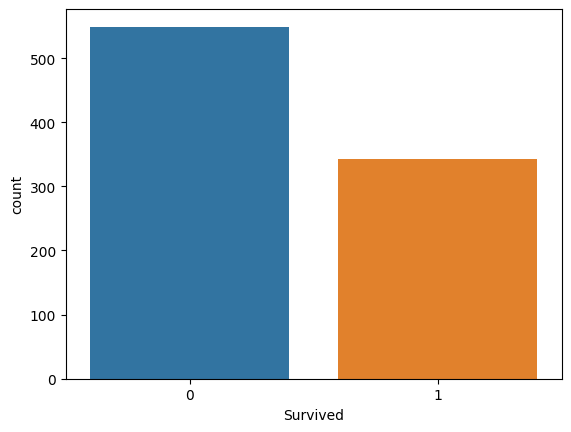

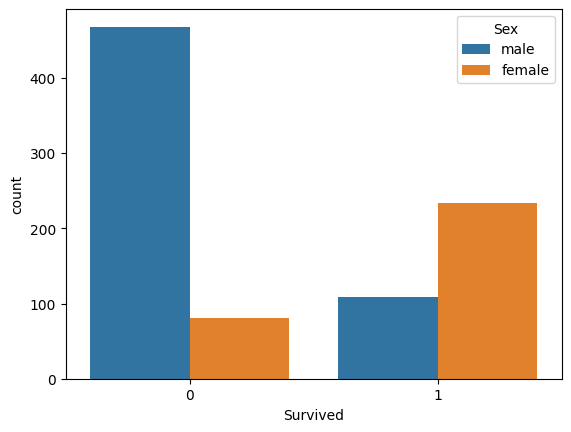

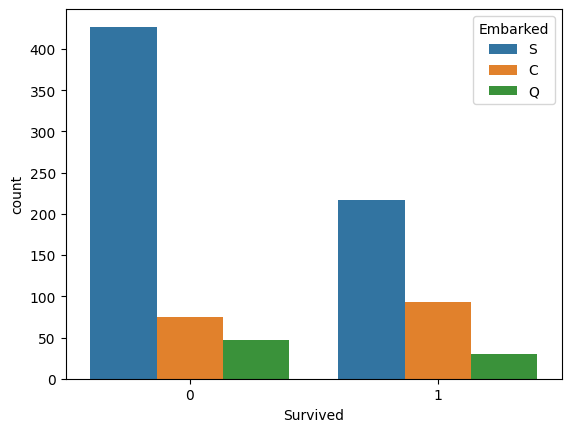

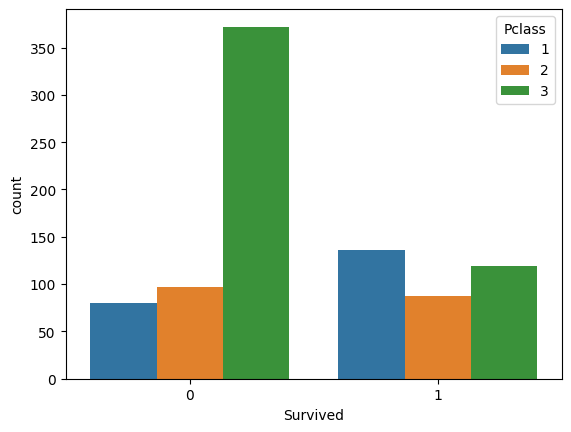

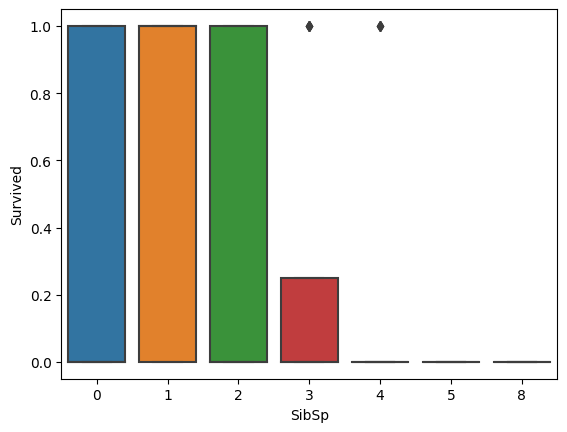

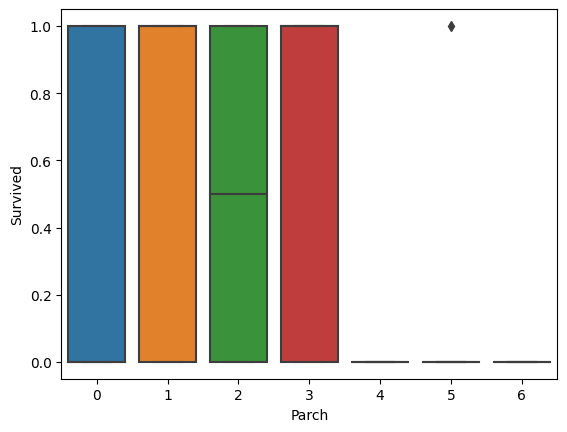

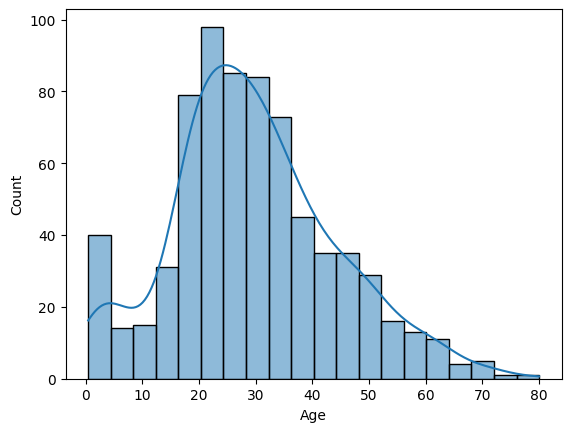

In [77]:
# Import visualization libraries  
import seaborn as sns  
import matplotlib.pyplot as plt  

# Count plot of survival distribution  
count_plt = sns.countplot(x="Survived", data=train)  
plt.show()  

# Survival count based on gender  
Sex_plt = sns.countplot(x="Survived", data=train, hue="Sex")  
plt.show()  

# Survival count based on embarkation point  
Embarked_plt = sns.countplot(x="Survived", data=train, hue="Embarked")  
plt.show()  

# Survival count based on passenger class  
Pclass_plt = sns.countplot(x="Survived", data=train, hue="Pclass")  
plt.show()  

# Box plot showing the relationship between siblings/spouses aboard and survival  
SibSp_plt = sns.boxplot(x="SibSp", y="Survived", data=train)  
plt.show()  

# Box plot showing the relationship between parents/children aboard and survival  
Parch_plt = sns.boxplot(x="Parch", y="Survived", data=train)  
plt.show()  

# Distribution plot of age  
Age_plt = sns.histplot(train["Age"], kde=True)  # Updated: distplot is deprecated  
plt.show()  

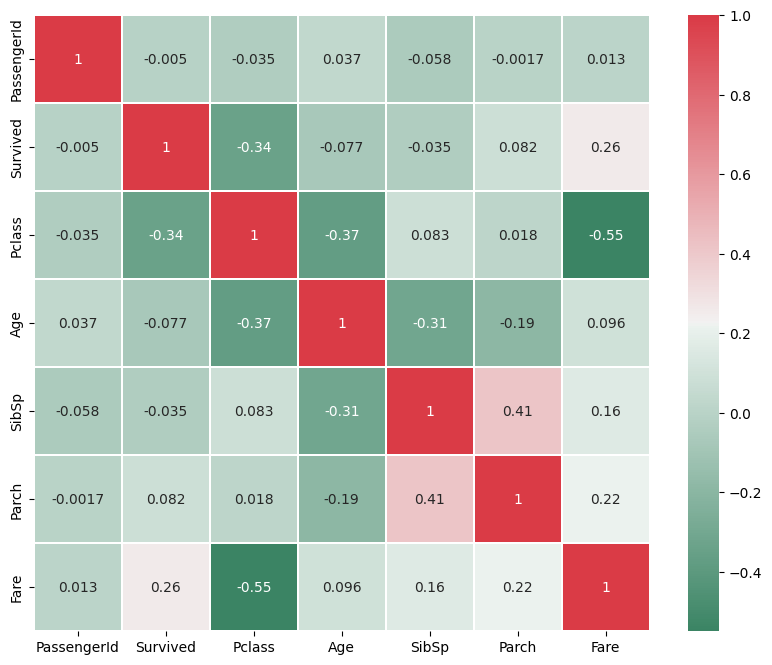

In [78]:
# Select only numeric columns  
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns  

# Compute the correlation matrix  
corr = train[numeric_cols].corr()  

# Create the heatmap  
f, ax = plt.subplots(figsize=(10, 8))  # Set figure size  
sns.heatmap(corr,  
            linewidths=0.1,  # Set line width between cells  
            annot=True,  # Display correlation values in each cell  
            cmap=sns.diverging_palette(150, 10, as_cmap=True),  # Set color palette  
            square=True,  # Ensure cells are square-shaped  
            ax=ax)  # Assign the subplot to the heatmap  

plt.show()  # Display the heatmap  

In [79]:
# Fill missing values in the 'Age' column with the mean age from the training set
train['Age'].fillna(train['Age'].mean(), inplace=True)

# Fill missing values in the 'Age' column in the test set with the mean age from the training set
test['Age'].fillna(train['Age'].mean(), inplace=True)

# Fill missing values in the 'Fare' column in the test set with the mean fare from the training set
test['Fare'].fillna(train['Fare'].mean(), inplace=True)

# Fill missing values in the 'Embarked' column with 'S' (mode value from the training set)
train['Embarked'].fillna('S', inplace=True)


In [80]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [81]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [82]:
# Drop unnecessary columns in the training and test datasets
train.drop(columns=["Cabin", "Name", "Ticket"], axis=1, inplace=True)  # Remove 'Cabin', 'Name', and 'Ticket' columns from the training set
test.drop(columns=["Cabin", "Name", "Ticket"], axis=1, inplace=True)  # Remove 'Cabin', 'Name', and 'Ticket' columns from the test set

# Drop the 'PassengerId' column from the training set
train = train.drop(['PassengerId'], axis=1)


In [83]:
# Changing 'Sex' from categorical to numeric (female = 1, male = 0)
train.loc[train.Sex == 'female', 'Sex'] = 1  # Assign 1 to female
train.loc[train.Sex == 'male', 'Sex'] = 0    # Assign 0 to male
train["Sex"] = train["Sex"].astype(str).astype(float)  # Convert 'Sex' to numeric (float)

# Changing 'Embarked' from categorical strings to numeric (S = 3, C = 2, Q = 1)
train.loc[train.Embarked == 'S', 'Embarked'] = 3  # Assign 3 to S (Southampton)
train.loc[train.Embarked == 'C', 'Embarked'] = 2  # Assign 2 to C (Cherbourg)
train.loc[train.Embarked == 'Q', 'Embarked'] = 1  # Assign 1 to Q (Queenstown)
train["Embarked"] = train["Embarked"].astype(str).astype(float)  # Convert 'Embarked' to numeric (float)

In [95]:
# Fill missing values for 'Age' and 'Fare' in the test dataset
test['Age'] = test['Age'].fillna(test['Age'].mean())  # Fill missing 'Age' with mean 'Age'
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())  # Fill missing 'Fare' with mean 'Fare'

# Convert 'Sex' from categorical to numeric (female = 1, male = 0)
test.loc[test.Sex == 'female', 'Sex'] = 1  # Assign 1 to female
test.loc[test.Sex == 'male', 'Sex'] = 0    # Assign 0 to male
test["Sex"] = test["Sex"].astype(str).astype(float)  # Convert 'Sex' to numeric (float)

# Convert 'Embarked' from categorical strings to numeric (S = 3, C = 2, Q = 1)
test.loc[test.Embarked == 'S', 'Embarked'] = 3  # Assign 3 to S (Southampton)
test.loc[test.Embarked == 'C', 'Embarked'] = 2  # Assign 2 to C (Cherbourg)
test.loc[test.Embarked == 'Q', 'Embarked'] = 1  # Assign 1 to Q (Queenstown)
test["Embarked"] = test["Embarked"].astype(str).astype(float)  # Convert 'Embarked' to numeric (float)

# Check for any remaining missing values in the test dataset
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [96]:
# Checking the first few rows of the training and test datasets
print(train.head())  # Displays the first 5 rows of the training set
print(test.head())   # Displays the first 5 rows of the test set

# Checking the correlation matrix of the training dataset
print(train.corr())  # Displays the correlation matrix of numeric columns in the training set

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3  0.0  22.0      1      0   7.2500       3.0
1         1       1  1.0  38.0      1      0  71.2833       2.0
2         1       3  1.0  26.0      0      0   7.9250       3.0
3         1       1  1.0  35.0      1      0  53.1000       3.0
4         0       3  0.0  35.0      0      0   8.0500       3.0
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0          892       3  0.0  34.5      0      0   7.8292       1.0
1          893       3  1.0  47.0      1      0   7.0000       3.0
2          894       2  0.0  62.0      0      0   9.6875       1.0
3          895       3  0.0  27.0      0      0   8.6625       3.0
4          896       3  1.0  22.0      1      1  12.2875       3.0
          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481  0.543351 -0.069809 -0.035322  0.081629   
Pclass   -0.338481  1.000000 -0.131900 -0.331339  0.083081  0.018443  

In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    float64
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 26.2 KB


In [97]:
# Classification Methods

# Preparing data for training and prediction
train_x = train.drop(columns=["Survived"], axis=1)  # Features in the training set (excluding the 'Survived' column)
train_y = train["Survived"]  # Target variable (Survived)

test_x = test.drop("PassengerId", axis=1)  # Features in the test set (excluding 'PassengerId')

# Logistic Regression
logistic = LogisticRegression(solver='liblinear')  # Initialize the Logistic Regression model
logistic.fit(train_x, train_y)  # Train the model on the training data

# Making predictions on the test data
predictions_LR = logistic.predict(test_x)  # Predict 'Survived' on the test set

# Evaluate the model's performance on the training data
print(logistic.score(train_x, train_y))  # Print the accuracy of the model on the training set

0.8024691358024691


In [89]:
# Sorting k nearest neighbours classifier

KNN_classifier = KNeighborsClassifier(n_neighbors=3)
KNN_classifier.fit(train_x, train_y)
predictions_KNN = KNN_classifier.predict(test_x)

print(KNN_classifier.score(train_x, train_y))

0.8305274971941639


In [98]:
# Random Forest Classifier

# Initialize RandomForestClassifier with hyperparameters
model_RF = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    max_depth=4,             # Maximum depth of the trees
    min_samples_split=2,     # Minimum samples required to split an internal node
    min_samples_leaf=2,      # Minimum samples required to be at a leaf node
    random_state=2          # Random state for reproducibility
)

# Fit the Random Forest model to the training data
model_RF.fit(train_x, train_y)

# Predict the target variable for the test data
predictions_RF = model_RF.predict(test_x)

# Evaluate the Random Forest model's performance on the training data
print(model_RF.score(train_x, train_y))  # Accuracy on the training set

0.8439955106621774


In [99]:
# Gradient Boosting Classifier

# Initialize GradientBoostingClassifier with hyperparameters
model_GB = GradientBoostingClassifier(
    min_samples_leaf=5,        # Minimum samples required to be at a leaf node
    max_leaf_nodes=5          # Maximum number of leaf nodes in the tree
)

# Fit the Gradient Boosting model to the training data
model_GB.fit(train_x, train_y)

# Predict the target variable for the test data
predictions_GB = model_GB.predict(test_x)

# Evaluate the Gradient Boosting model's performance on the training data
print(model_GB.score(train_x, train_y))  # Accuracy on the training set


0.8664421997755332


In [101]:
# XGBoost Classifier

# Initialize XGBClassifier with hyperparameters
model_XGB = XGBClassifier(
    learning_rate=0.005,        # The learning rate (controls the step size at each iteration)
    use_label_encoder=False,    # Avoids deprecation warning related to label encoder
    n_estimators=1000,          # Number of trees in the model
    max_depth=4,                # Maximum depth of the trees
    min_child_weight=0,         # Minimum sum of instance weight (hessian) required in a child
    gamma=0.6,                  # Regularization parameter, controls whether we will split the node or not
    subsample=0.7,              # Fraction of samples used for fitting trees
    colsample_bytree=0.7,       # Fraction of features used for fitting trees
    objective='reg:squarederror',  # Objective function for regression tasks
    nthread=-1,                 # Number of threads used for parallel computation (-1 means use all available)
    seed=27,                    # Random seed for reproducibility
    reg_alpha=0.00006,          # L1 regularization term on weights
    random_state=30             # Random state for reproducibility
)

# Fit the XGBoost model to the training data
model_XGB.fit(train_x, train_y)

# Predict the target variable for the test data
predictions_XGB = model_XGB.predict(test_x)

# Evaluate the XGBoost model's performance on the training data
print(model_XGB.score(train_x, train_y))  # Accuracy on the training set

0.8462401795735129


In [102]:
# Final Predictions

# Combine predictions from Gradient Boosting and XGBoost by averaging them
predictions = [round((prediction_GB + prediction_XGB) / 2) for prediction_GB, prediction_XGB in zip(predictions_GB, predictions_XGB)]

# Fit the XGBoost model on the test set using the combined predictions as the target
model_XGB.fit(test_x, predictions)

# Make new predictions using the model trained on the combined predictions
predictions = model_XGB.predict(test_x)

# Combine predictions from Gradient Boosting and XGBoost once again (this step might be redundant)
predictions = [round((prediction_GB + prediction_XGB) / 2) for prediction_GB, prediction_XGB in zip(predictions_GB, predictions_XGB)]

In [103]:
import os

# Create the output directory if it doesn't exist
os.makedirs('./output', exist_ok=True)

# Now save the submission file
output = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": predictions})

# Save the dataframe as a CSV file in the 'output' directory
output.to_csv("./output/Submission.csv", index=False)

# Print confirmation
print("Done")

Done
